In [35]:
import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
lh = pd.read_pickle('../data/counting.pkl')

In [3]:
################################
#                              #
#       Listening counts       #
#                              #
################################

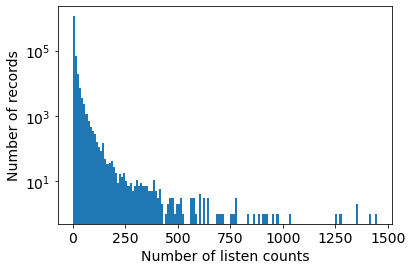

In [4]:
lh_list = lh['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh['count'].max()+1,10)]
plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./dv_all.png', dpi=600)
plt.show()

In [32]:
lh_u_max = lh[lh['uid']==lh[lh['count']==max(lh['count'])]['uid'].values[0]]
lh_u_max = lh_u_max.sort_values(by='count', ascending='True')
lh_u_max[-5:]

,uid,tid,count
1202101,215,11751,1352
1206228,215,216412,1358
1202114,215,11859,1410
1201129,215,617,1443
1203803,215,31195,1457


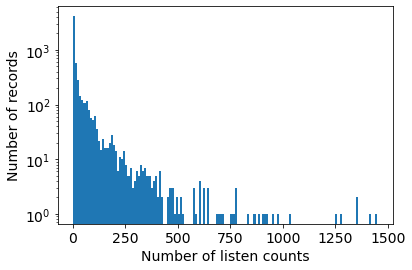

In [33]:
lh_list = lh_u_max['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh_u_max['count'].max()+1,10)]
n, bins, patches = plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./dv_max_user.png', dpi=600)
plt.show()

In [7]:
#################################
#                               #
#     Rating Normalization      #
#                               #
#################################

In [43]:
dir_ = '../data/'
file_name = 'normalized_to_rating_filter_track_5_user_100.csv'
linear = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
linear

,uid,tid,rating,minmax,count
4,0,0,4.75,1.595745,15
5,0,1,2.50,0.319149,3
6,0,2,0.25,0.106383,1
7,0,3,0.25,0.106383,1
8,0,4,4.50,1.063830,10
...,...,...,...,...,...
1256928,219,54824,4.75,1.219512,10
1256936,219,54867,1.75,0.243902,2
1256949,219,54900,0.25,0.121951,1
1256989,219,54958,0.25,0.121951,1


In [52]:
v = linear['rating'].values.tolist()
b = [i for i in np.arange(0,6,0.25)]

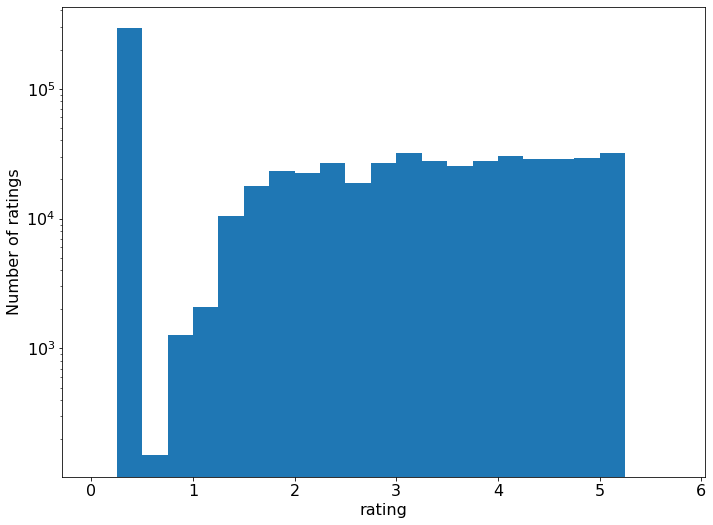

In [53]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.savefig('./dv_rating_linear.png', dpi=600)
plt.show()

In [40]:
dir_ = '../data/'
file_name = 'normalized_log_filter_track_5_user_100.csv'
log = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
log

,uid,tid,rating,count
4,0,0,1.204120,15
5,0,1,0.602060,3
6,0,2,0.301030,1
7,0,3,0.301030,1
8,0,4,1.041393,10
...,...,...,...,...
1256928,219,54824,1.041393,10
1256936,219,54867,0.477121,2
1256949,219,54900,0.301030,1
1256989,219,54958,0.301030,1


In [60]:
v = log['rating'].values.tolist()
b = [i for i in np.arange(0,6,0.25)]

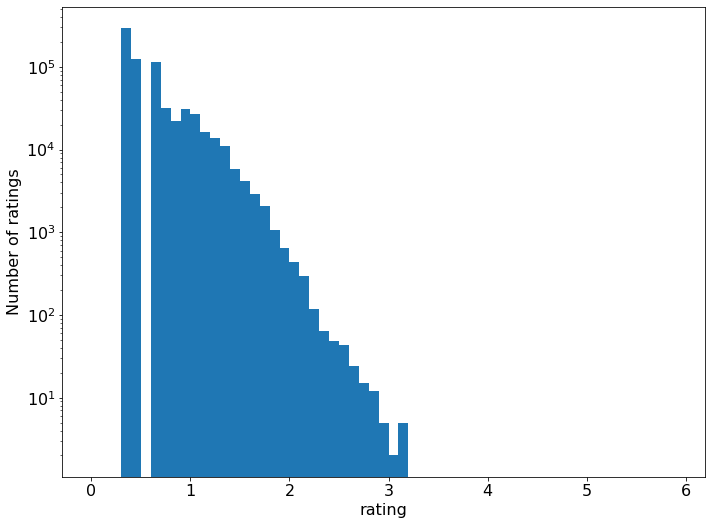

In [59]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.savefig('./dv_rating_log.png', dpi=600)
plt.show()

In [41]:
dir_ = '../data/'
file_name = 'normalized_minmax_filter_track_5_user_100.csv'
minmax = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
minmax

,uid,tid,rating,minmax,count
4,0,0,4.75,1.595745,15
5,0,1,2.50,0.319149,3
6,0,2,0.25,0.106383,1
7,0,3,0.25,0.106383,1
8,0,4,4.50,1.063830,10
...,...,...,...,...,...
1256928,219,54824,4.75,1.219512,10
1256936,219,54867,1.75,0.243902,2
1256949,219,54900,0.25,0.121951,1
1256989,219,54958,0.25,0.121951,1


In [63]:
v = minmax['minmax'].values.tolist()
b = [i for i in np.arange(0,6,0.25)]

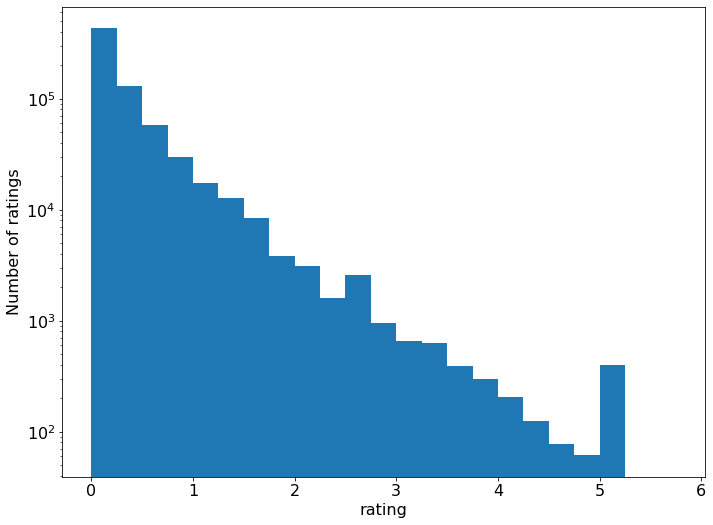

In [64]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.savefig('./dv_rating_minmax.png', dpi=600)
plt.show()

In [8]:
#################################
#                               #
#       Pop. Normalization      #
#                               #
#################################

In [9]:
# POP form listening users
tid_list = []
pop_list = []
for i in tqdm(lh['tid'].unique()):
    tid_list.append(i)
    pop_list.append(len(lh[lh['tid']==i]))
    
d = {'tid': tid_list, 'rating': pop_list}
df_pop_u = pd.DataFrame(data=d)
df_pop_u = df_pop_u.sort_values(by=['rating'], ascending=False)
df_pop_u[:10]

,tid,rating
214,214,169
13850,13850,145
460,460,137
6242,6242,135
96,96,133
1422,1422,125
2467,2467,121
576,576,121
262,262,118
4789,4789,117


In [10]:
lh_list_u = df_pop_u['rating'].values.tolist()
bins_u = [i for i in range(0,df_pop_u['rating'].max()+1,1)]

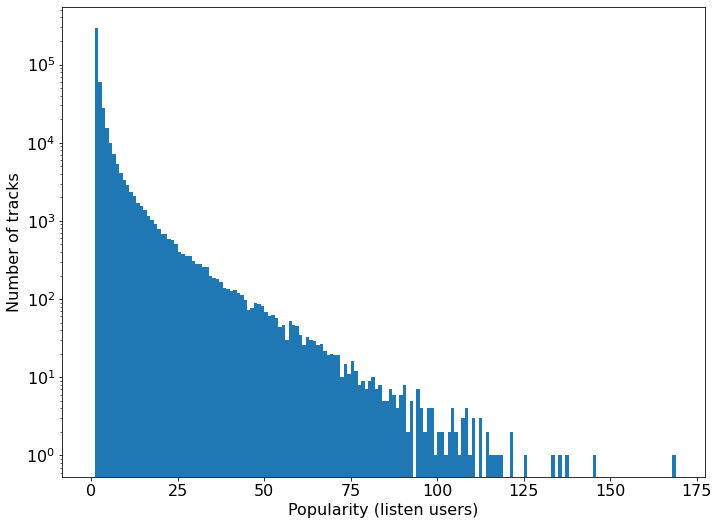

In [11]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(lh_list_u, bins=bins_u)
plt.yscale('log')
plt.ylabel('Number of tracks')
plt.xlabel('Popularity (listen users)')
plt.savefig('./dv_pop_user.png', dpi=600)
plt.show()

In [12]:
# POP form listening counts
tid_list = []
pop_list = []
for i in tqdm(lh['tid'].unique()):
    tid_list.append(i)
    pop_list.append(lh[lh['tid']==i].sum()['count'])
    
d = {'tid': tid_list, 'rating': pop_list}
df_pop_c = pd.DataFrame(data=d)
df_pop_c = df_pop_c.sort_values(by=['rating'], ascending=False)
df_pop_c[:10]

,tid,rating
214,214,4231
96,96,2248
617,617,2200
1891,1891,1977
11859,11859,1942
460,460,1927
13850,13850,1844
38656,38656,1757
31195,31195,1667
6242,6242,1660


In [13]:
lh_list_c = df_pop_c['rating'].values.tolist()
bins_c = [i for i in range(0,df_pop_c['rating'].max()+1000,1)]

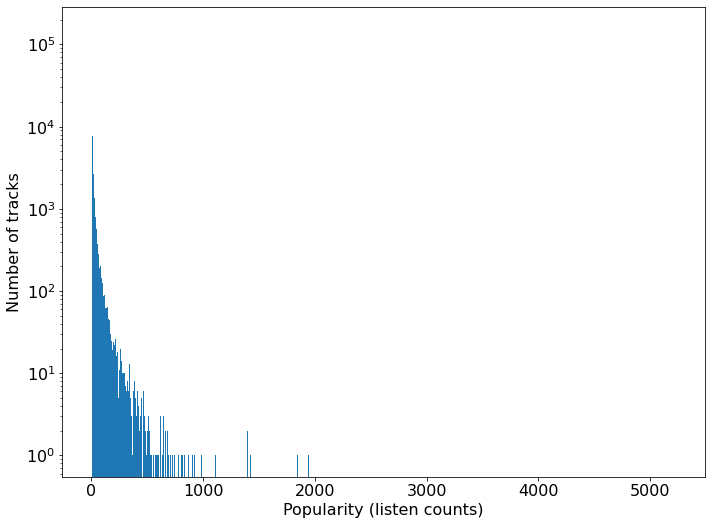

In [14]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(lh_list_c, bins=bins_c)
plt.yscale('log')
plt.ylabel('Number of tracks')
plt.xlabel('Popularity (listen counts)')
plt.savefig('./dv_pop_count.png', dpi=600)
plt.show()

In [15]:
df_pop_u = df_pop_u.sort_values(by=['tid'], ascending=False)
df_pop_c = df_pop_c.sort_values(by=['tid'], ascending=False)

/home/han/anaconda3/envs/fm/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


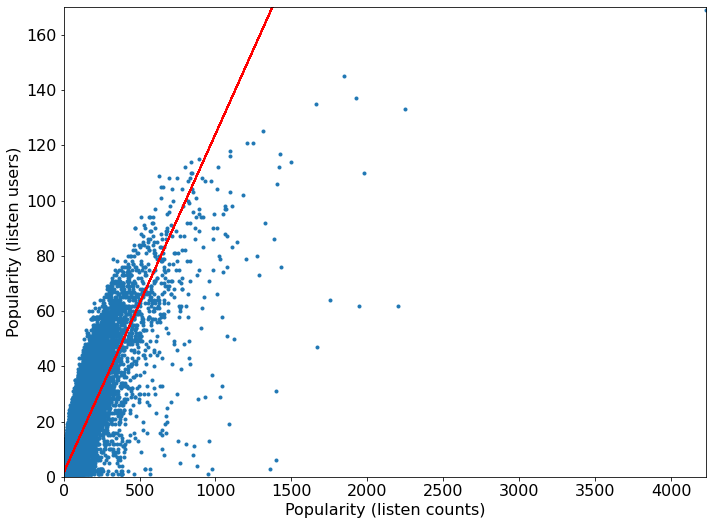

0.8431644635400323

In [16]:
fig_x = 1.8
x = df_pop_c['rating'].values.tolist()
y = df_pop_u['rating'].values.tolist()
#設定大小跟x軸兩端的值
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
plt.xlim(0, max(x)+1)
plt.ylim(0, max(y)+1)
plt.scatter(x, y, marker='.') 

pearR = np.corrcoef(x,y)[1,0]
A = np.vstack([x,np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,np.array(y))[0]
x_ = np.array(x)*m+c
plt.plot(x,x_,color='r')

#視覺化標題跟xy軸名稱
plt.xlabel('Popularity (listen counts)')
plt.ylabel('Popularity (listen users)')
plt.savefig('./dv_pop_compare.png', dpi=600)
#出圖
plt.show()
pearR